The objective of this project is to predict car prices in Belarus by analyzing various vehicle features, including brand, manufacturing year, engine specifications, fuel type, transmission, mileage, drive unit, color, and market segment. Another key goal is to identify the variables that have the greatest influence on car pricing.

The dataset used for this analysis was sourced from Kaggle and contains 56,244 rows and 12 columns, providing a comprehensive foundation for reliable modeling and insights.

## Data Dictionary

| Variable        | Description |
|-----------------|-------------|
| make            | Machine firm |
| model           | Machine model |
| price_usd       | Price in USD (target variable) |
| year            | Year of production |
| condition       | Represents the condition at the sale moment (with mileage, for parts, etc.) |
| mileage         | Mileage in kilometers |
| fuel_type       | Type of fuel (electric, petrol, diesel) |
| volume_cm3      | Engine volume in cubic centimeters |
| color           | Color of the car |
| transmission    | Type of transmission |
| drive_unit      | Drive unit |
| segment         | Segment of the car |


In [64]:
# Loading the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
from google.colab import files
uploaded = files.upload()

Saving cars (1).csv to cars (1) (2).csv


In [66]:
# Loading the dataset
df = pd.read_csv('/content/cars (1).csv')
df.head()

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,mazda,2,5500,2008,with mileage,162000.0,petrol,1500.0,burgundy,mechanics,front-wheel drive,B
1,mazda,2,5350,2009,with mileage,120000.0,petrol,1300.0,black,mechanics,front-wheel drive,B
2,mazda,2,7000,2009,with mileage,61000.0,petrol,1500.0,silver,auto,front-wheel drive,B
3,mazda,2,3300,2003,with mileage,265000.0,diesel,1400.0,white,mechanics,front-wheel drive,B
4,mazda,2,5200,2008,with mileage,97183.0,diesel,1400.0,gray,mechanics,front-wheel drive,B


### Data Preprocessing

In [67]:
# Checking the shape of the dataset
df.shape

(56244, 12)

In [68]:
# Checking the data types of the columns
df.dtypes

,0
make,object
model,object
priceUSD,int64
year,int64
condition,object
mileage(kilometers),float64
fuel_type,object
volume(cm3),float64
color,object
transmission,object


In [69]:
# Droping the columns that are not needed for the analysis
df.drop(columns = ['model','segment'], inplace=True)

In [70]:
# Unique values in the columns
df.nunique()

,0
make,96
priceUSD,2970
year,78
condition,3
mileage(kilometers),8400
fuel_type,3
volume(cm3),458
color,13
transmission,2
drive_unit,4


In [71]:
# Unqiue car make
df['make'].unique()

array(['mazda', 'mg', 'renault', 'gaz', 'aro', 'rover', 'uaz',
       'alfa-romeo', 'audi', 'oldsmobile', 'saab', 'peugeot', 'chrysler',
       'wartburg', 'moskvich', 'volvo', 'fiat', 'roewe', 'porsche', 'zaz',
       'luaz', 'dacia', 'lada-vaz', 'izh', 'raf', 'bogdan', 'bmw',
       'nissan', 'mercedes-benz', 'mitsubishi', 'toyota', 'chery', 'gmc',
       'hyundai', 'honda', 'ssangyong', 'suzuki', 'opel', 'seat',
       'volkswagen', 'daihatsu', 'chevrolet', 'geely', 'saturn', 'kia',
       'lincoln', 'eksklyuziv', 'citroen', 'dong-feng', 'pontiac', 'ford',
       'subaru', 'bentley', 'faw', 'cadillac', 'lifan', 'plymouth',
       'hafei', 'shanghai-maple', 'mini', 'jeep', 'skoda', 'mercury',
       'changan', 'lexus', 'isuzu', 'aston-martin', 'lancia',
       'great-wall', 'land-rover', 'jaguar', 'buick', 'daewoo', 'vortex',
       'infiniti', 'byd', 'smart', 'maserati', 'haval', 'acura', 'scion',
       'tata', 'datsun', 'tesla', 'mclaren', 'ravon', 'trabant', 'proton',
       'fso

Since there are many car makes in the dataset, analyzing each one individually would be inefficient and complex. To simplify the analysis, the car makes will be grouped into broader categories based on their country of origin and market positioning. The categories used are: Luxury European, Mainstream European, Russian/Eastern European, Asian, American, Specialty, and Other. This grouping helps reduce dimensionality, improves interpretability, and allows for clearer comparison of pricing and performance patterns across regions and market segments.

### Descriptive Statistics

In [72]:
df.describe()

,priceUSD,year,mileage(kilometers),volume(cm3)
count,56244.000000,56244.000000,5.624400e+04,56197.000000
mean,7415.456440,2003.454840,2.443956e+05,2104.860615
std,8316.959261,8.144247,3.210307e+05,959.201633
min,48.000000,1910.000000,0.000000e+00,500.000000
25%,2350.000000,1998.000000,1.370000e+05,1600.000000
50%,5350.000000,2004.000000,2.285000e+05,1996.000000
75%,9807.500000,2010.000000,3.100000e+05,2300.000000
max,235235.000000,2019.000000,9.999999e+06,20000.000000


In [73]:
df.head()

,make,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit
0,mazda,5500,2008,with mileage,162000.0,petrol,1500.0,burgundy,mechanics,front-wheel drive
1,mazda,5350,2009,with mileage,120000.0,petrol,1300.0,black,mechanics,front-wheel drive
2,mazda,7000,2009,with mileage,61000.0,petrol,1500.0,silver,auto,front-wheel drive
3,mazda,3300,2003,with mileage,265000.0,diesel,1400.0,white,mechanics,front-wheel drive
4,mazda,5200,2008,with mileage,97183.0,diesel,1400.0,gray,mechanics,front-wheel drive


## Exploratory Data Analysis

During exploratory data analysis (EDA), the relationships between the target variable (price in USD) and the independent variables are examined, along with the relationships among the independent variables themselves. This process supports understanding of the dataset structure, identification of patterns and trends, detection of potential outliers, and assessment of correlations. The insights obtained from EDA are used to determine which features have the strongest influence on the target variable and to guide feature engineering and model selection in subsequent stages of the analysis.

### Car Make Segment

In [74]:
df['make'] = df['make'].str.lower()
df['make_segment'] = df['make'].apply(map_make_to_segment)

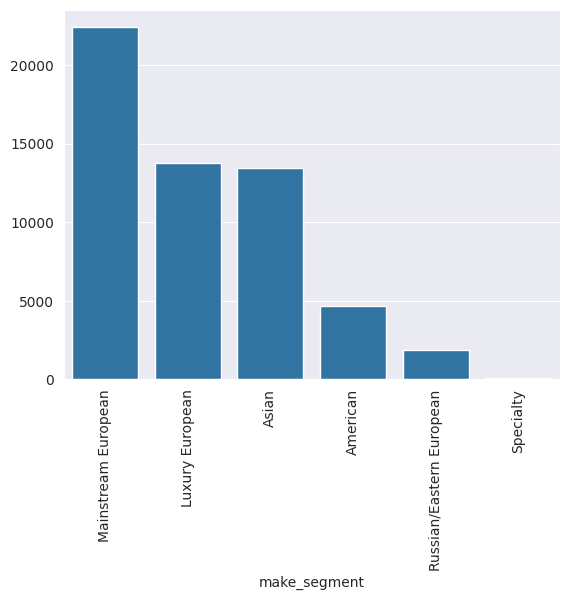

In [75]:
counts = df['make_segment'].value_counts()

sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=90)
plt.show()

The bar chart shows the distribution of cars in the dataset by their make segment. Mainstream European cars are the most common, followed by Luxury European and Asian cars, which have similar counts. American cars are less frequent, and Russian/Eastern European cars are even fewer. Specialty cars, such as Tesla, McLaren, or Bentley, are the least represented in the dataset.

### Categorical Variable Distribution

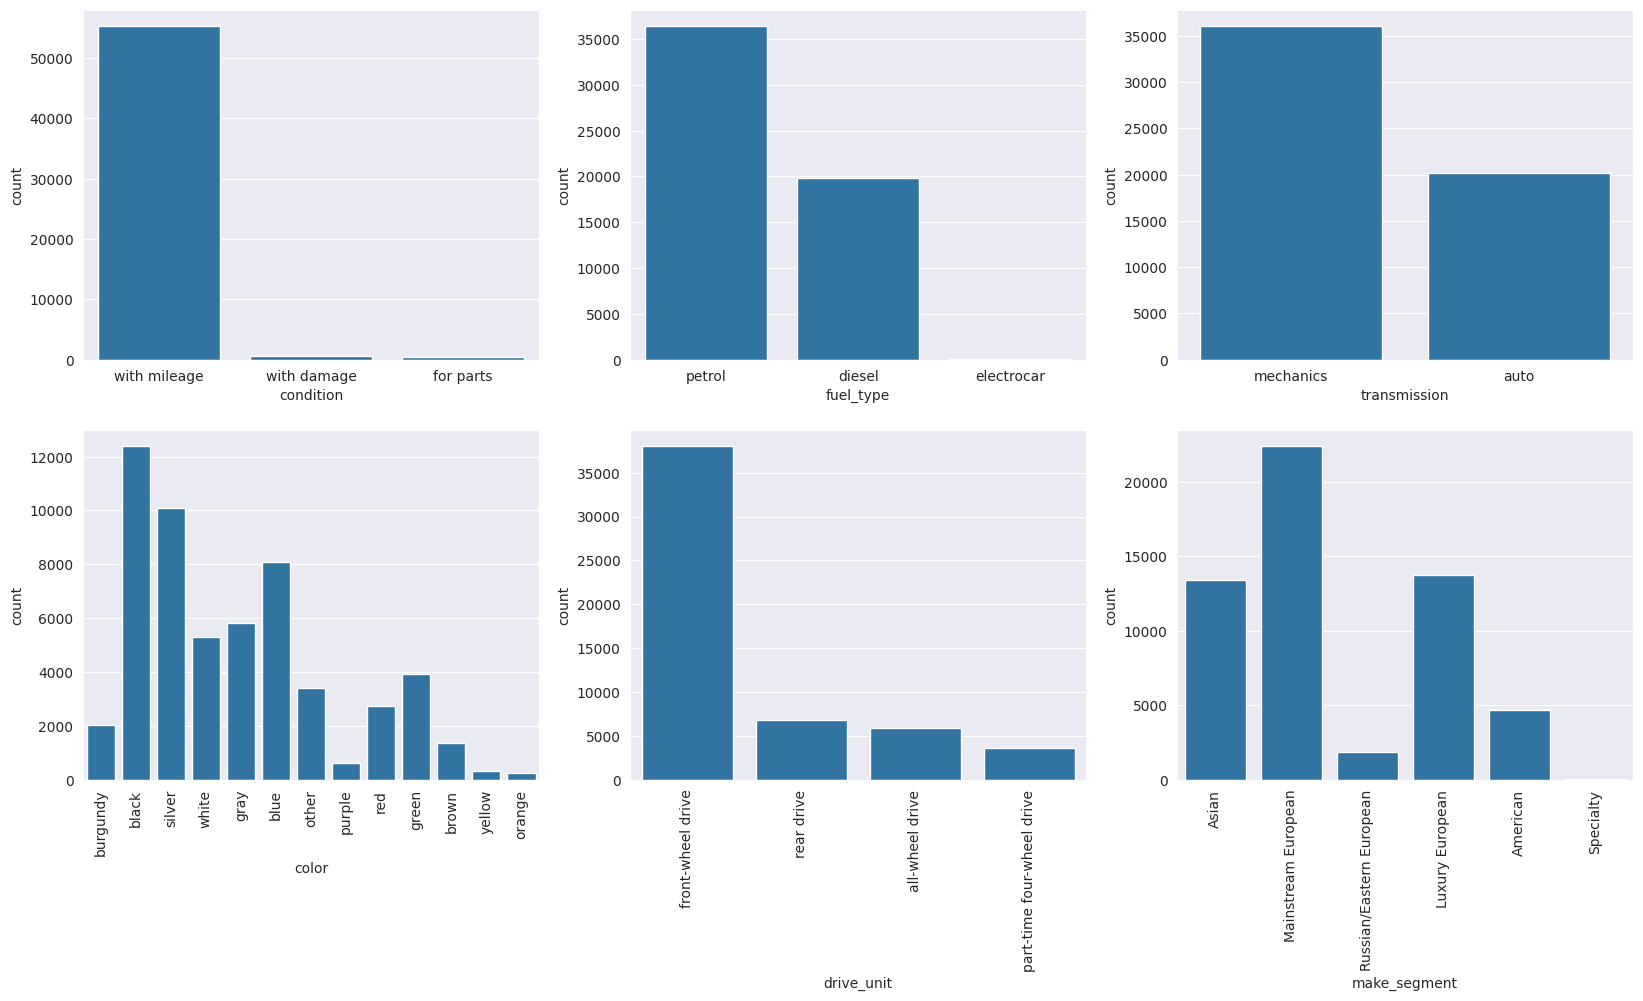

In [63]:
fig, ax = plt.subplots(2,3,figsize=(20,10))
sns.countplot(x='condition', data=df, ax=ax[0,0])
sns.countplot(x='fuel_type', data=df, ax=ax[0,1])
sns.countplot(x='transmission', data=df, ax=ax[0,2])
sns.countplot(x='color', data=df, ax=ax[1,0])
ax[1,0].tick_params(axis='x', rotation=90)
sns.countplot(x='drive_unit', data=df, ax=ax[1,1])
ax[1,1].tick_params(axis='x', rotation=90)
sns.countplot(x='make_segment', data=df, ax=ax[1,2])
ax[1,2].tick_params(axis='x', rotation=90)

From the graphs, we can get an overview of the dataset across the categorical variables. It is clear that the majority of cars being sold are in working condition. Most of them run on petrol, followed by diesel, while very few are electric. The majority of cars have manual transmission, are front-wheel drive, and come in common colors such as black, silver, blue, white, and grey.

### Continuous Variable Distribution

<Axes: xlabel='volume(cm3)', ylabel='Count'>

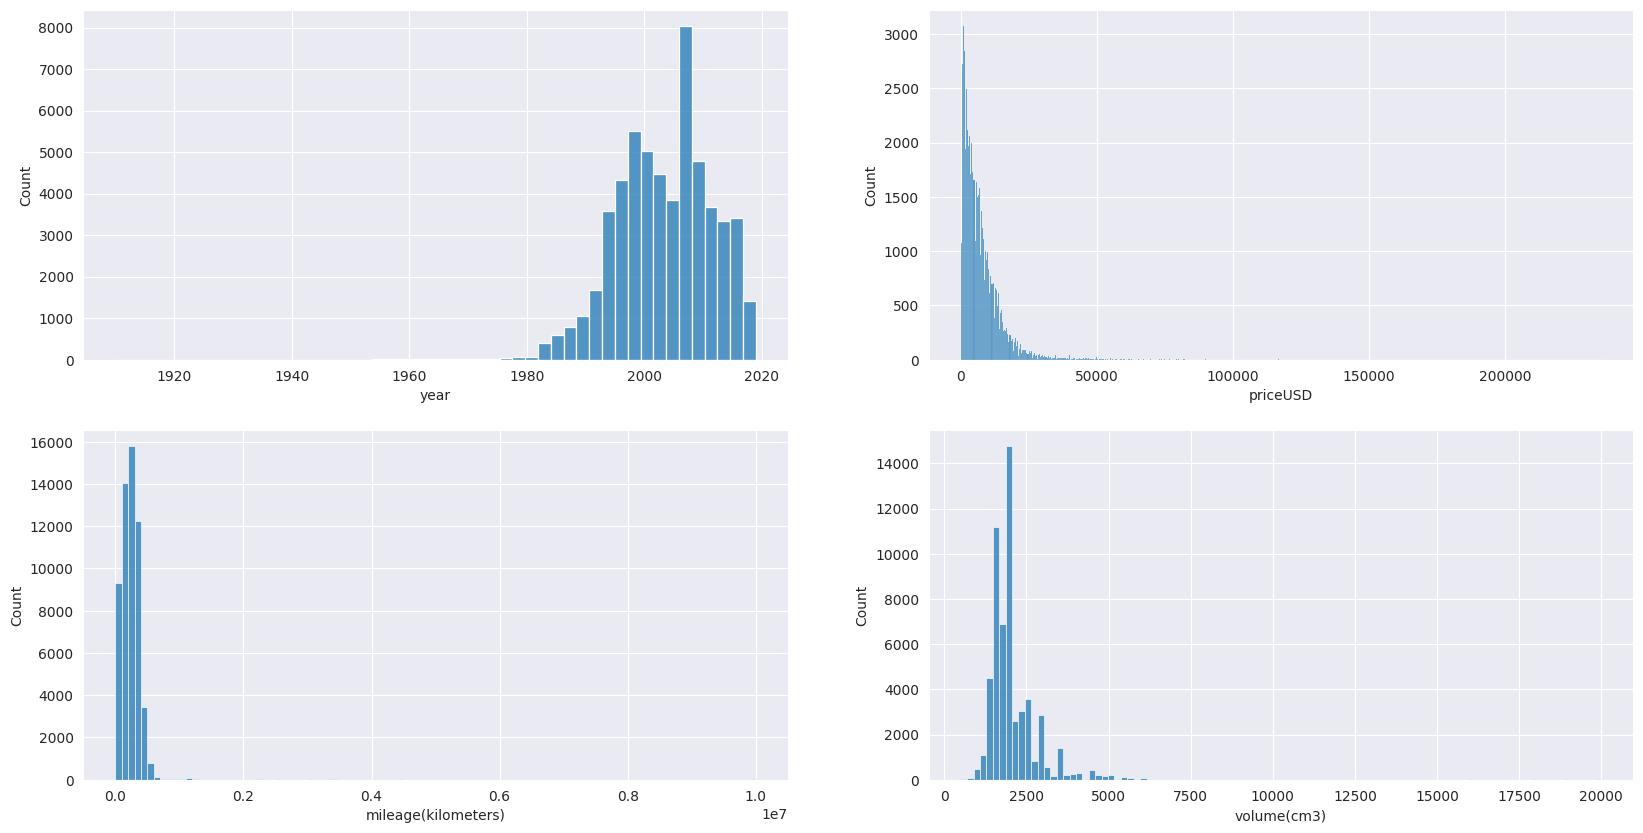

In [76]:
fig, ax = plt.subplots(2,2,figsize=(20,10))
sns.histplot (df['year'], ax=ax[0,0], bins = 50)
sns.histplot(df['priceUSD'], ax=ax[0,1])
sns.histplot(df['mileage(kilometers)'], ax=ax[1,0], bins = 100)
sns.histplot(df['volume(cm3)'], ax=ax[1,1], bins = 100)

The graphs above illustrate the distribution of the dataset across continuous variables. The majority of cars were manufactured between 1990 and 2019, with prices below 50,000 USD, mileage under 1 million kilometers, and engine volumes between 1750 and 2000 cm³.


Since most vehicles were manufactured after 1980, the analysis will focus only on cars produced from 1980 onwards to ensure a more relevant and consistent dataset.

In [77]:
df= df[df['year']>1980]

### Price and Make

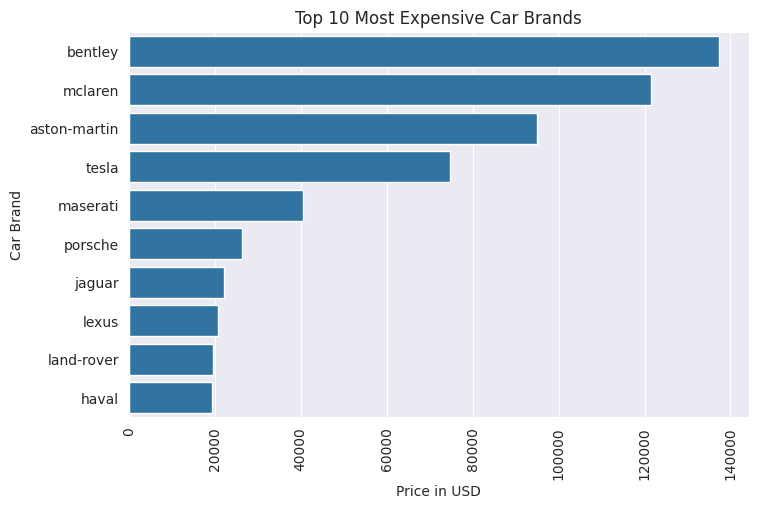

In [78]:
demodf = df.groupby('make')['priceUSD'].mean().reset_index()
demodf = demodf.sort_values(by='priceUSD', ascending=False).head(10)

#b Bar Plot
plt.figure(figsize=(8,5))
sns.barplot(y='make', x='priceUSD', data=demodf)
plt.xticks(rotation=90)
plt.title('Top 10 Most Expensive Car Brands')
plt.ylabel('Car Brand')
plt.xlabel('Price in USD')
plt.show()

This graph shows top 10 most expensive car brands in the data set. The top 5 most expensive car brands are Bentley, Mclaren, aston-martin, Tesla and meserati.

### Price and Condition

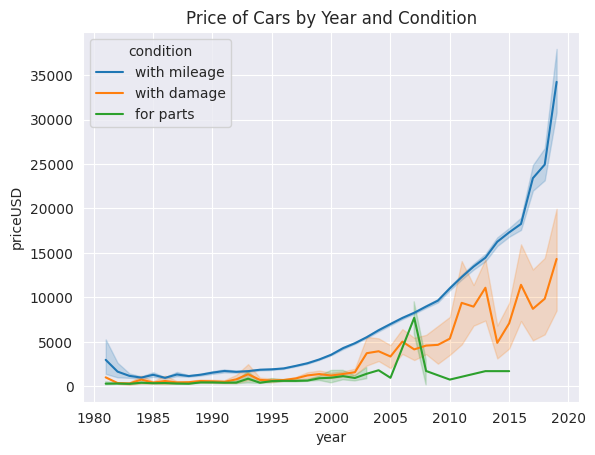

In [79]:
sns.lineplot(x = 'year', y = 'priceUSD', data = df, hue = 'condition')
plt.title('Price of Cars by Year and Condition')
plt.show()

The graph illustrates the relationship between car price, year of manufacture, and selling condition. Cars sold in working condition are more expensive, with prices increasing over time and an exponential rise observed between 2015 and 2020. Cars classified as damaged had prices similar to vehicles sold for parts between 1980 and 2000; however, the prices of damaged cars increased significantly after 2000. Cars sold for parts generally exhibit minimal prices, with only a slight increase over time.

Cars powered by petrol and diesel display similar mileage, although petrol cars generally command higher prices. Cars powered by electricity exhibit very high prices with comparatively low mileage.

### Price and Transmission

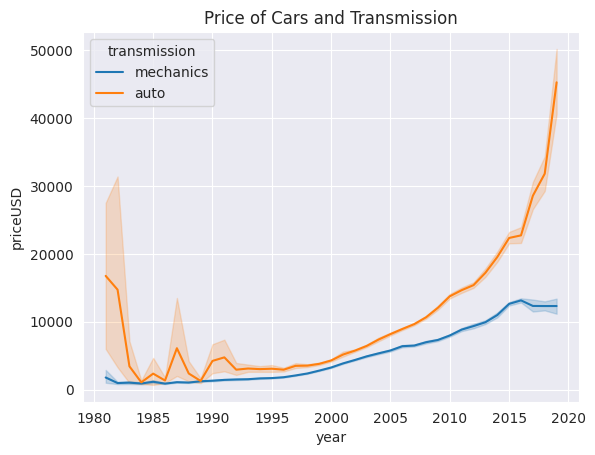

In [80]:
sns.lineplot(x = 'year', y = 'priceUSD', data = df, hue = 'transmission')
plt.title('Price of Cars and Transmission')
plt.show()

The graph shows the effect of transmission type on car price. Cars with automatic transmission experienced a significant price drop after 1983, followed by a rapid exponential rise after 2000. In contrast, cars with manual transmission remained consistently cheaper, though they also exhibited a noticeable price increase after 2000.

### Price and Fuel Type

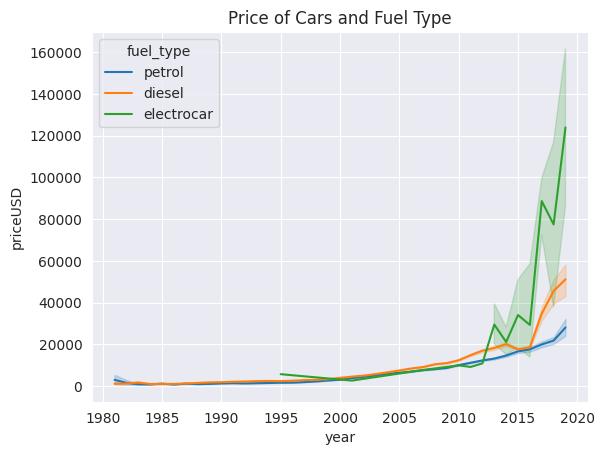

In [81]:
sns.lineplot(x = 'year', y = 'priceUSD', data = df, hue = 'fuel_type')
plt.title('Price of Cars and Fuel Type')
plt.show()

Until 2005, car prices for vehicles running on petrol and diesel were largely similar. After 2015, prices of petrol-powered cars increased significantly, while diesel-powered cars showed only a marginal rise. The graph also highlights the introduction of electric cars in 1995. Prices of electric vehicles rose exponentially after 2015, reaching the highest levels among all fuel types.

### Price and Drive Unit

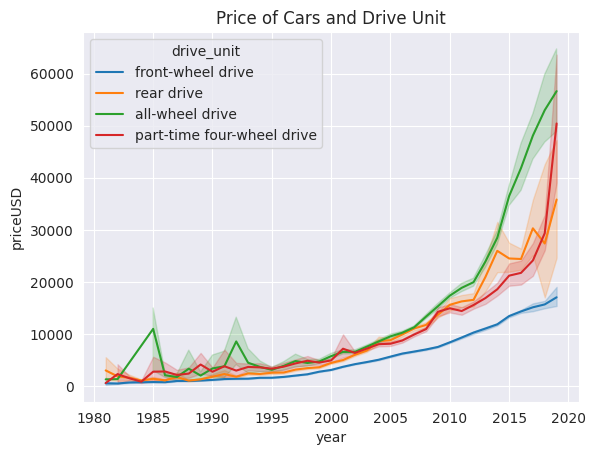

In [82]:
sns.lineplot(x = 'year', y = 'priceUSD', data = df, hue = 'drive_unit')
plt.title('Price of Cars and Drive Unit')
plt.show()

Between 1980 and 1995, car prices showed little variation across different drive units. After 1995, prices of front-wheel drive cars increased at a slower rate compared to other drive types. Prices of all-wheel drive cars rose sharply after 2005, reaching the highest levels among all drive units, followed by part-time four-wheel drive and rear-wheel drive vehicles.

### Price and Brand Segment

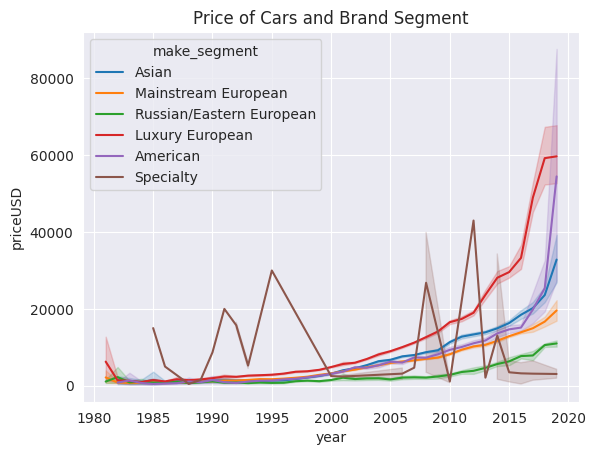

In [83]:
sns.lineplot(x = 'year', y = 'priceUSD', data = df, hue = 'make_segment')
plt.title('Price of Cars and Brand Segment')
plt.show()

The graph illustrates the surge in car prices after 2005. Prices of the specialty car segment increased most significantly, followed by luxury European, American, Asian, and mainstream European segments. Prices of the Russian/Eastern European segment rose at a slower pace and remained the lowest among all segments.

In [84]:
# checking for null values
df.isnull().sum()

,0
make,0
priceUSD,0
year,0
condition,0
mileage(kilometers),0
fuel_type,0
volume(cm3),47
color,0
transmission,0
drive_unit,1874


Since the number of null values is small relative to the size of the dataset, rows containing null values will be removed.

In [85]:
df = df.dropna()


In [86]:
df.drop(columns=['make'], inplace=True)

### Label encoding for object data type


In [87]:
from sklearn.preprocessing import LabelEncoder

# columns to encode
cols = ['condition', 'fuel_type', 'transmission', 'color', 'drive_unit', 'make_segment']

# Label encoding Object
le = LabelEncoder()

#label encoding for each column
for col in cols:
    le.fit(df[col])
    df[col] = le.transform(df[col])
    print(col, df[col].unique())

condition [2 1 0]
fuel_type [1 0]
transmission [1 0]
color [ 3  0 10 11  4  1  7  8  9  5  2 12  6]
drive_unit [1 3 0 2]
make_segment [1 3 4 2 0 5]


## Correlation Matrix Heatmap

<Axes: >

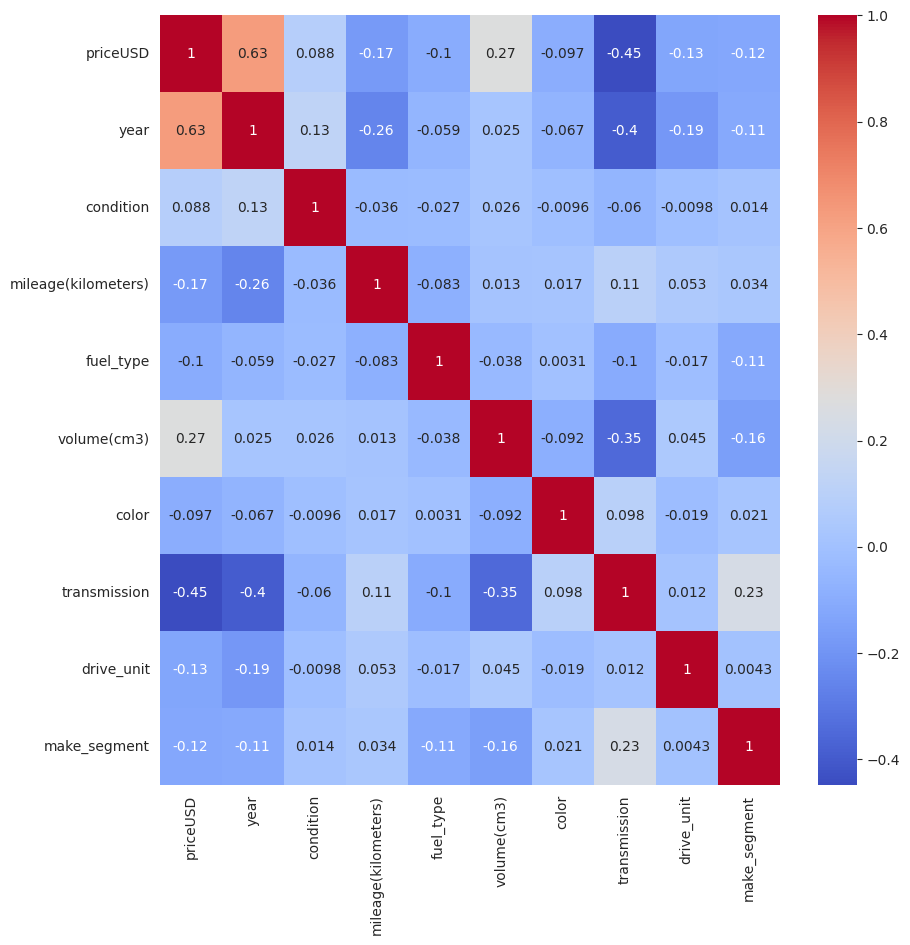

In [88]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

## Outlier Removal

In [89]:
# Using Z-score to remove outliers
from scipy import stats

z = np.abs(stats.zscore(df))

threshold = 3

#columns with outliers
cols = ['year', 'mileage(kilometers)', 'volume(cm3)']

#removing outliers
df = df[(z < 3).all(axis=1)]

## Train Test Split

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['priceUSD']), df['priceUSD'], test_size=0.2, random_state=42)

## Model Building

### Decision Tree Regressor

In [91]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree Regressor Object
dtr = DecisionTreeRegressor()

### Hypertuning using GridSearchCV

In [92]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Parameters for grid search (corrected max_features)
params = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['sqrt', 'log2', None],  # 'auto' removed
    'random_state': [0, 42]
}

# Grid Search Object
grid = GridSearchCV(
    estimator=dtr,
    param_grid=params,
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fitting the grid search
grid.fit(X_train, y_train)

# Best parameters
print(grid.best_params_)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
{'max_depth': 8, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'random_state': 0}


In [93]:
#decision tree regressor with best parameters
dtr = DecisionTreeRegressor(max_depth=8, max_features='sqrt', min_samples_leaf=4, min_samples_split=2, random_state=42)

#fitting the model
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, max_features='sqrt', min_samples_leaf=4,
                      random_state=42)

In [94]:
#training score
dtr.score(X_train, y_train)

0.8228645355638878

In [95]:
#predicting the test set
y_pred = dtr.predict(X_test)

## Model Evaluation

In [96]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print('R2 Score: ', r2_score(y_test, y_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score:  0.8101613025074655
Mean Squared Error:  6182893.550737506
Mean Absolute Error:  1641.6634153523744
Root Mean Squared Error:  2486.5424892282667


### Feature Importance

In [97]:
feat_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': dtr.feature_importances_})
feat_df = feat_df.sort_values(by='Importance', ascending=False)
feat_df

,Feature,Importance
0,year,0.624709
7,drive_unit,0.161447
4,volume(cm3),0.102069
2,mileage(kilometers),0.048709
6,transmission,0.026586
3,fuel_type,0.020699
8,make_segment,0.012307
5,color,0.003474
1,condition,0.000000


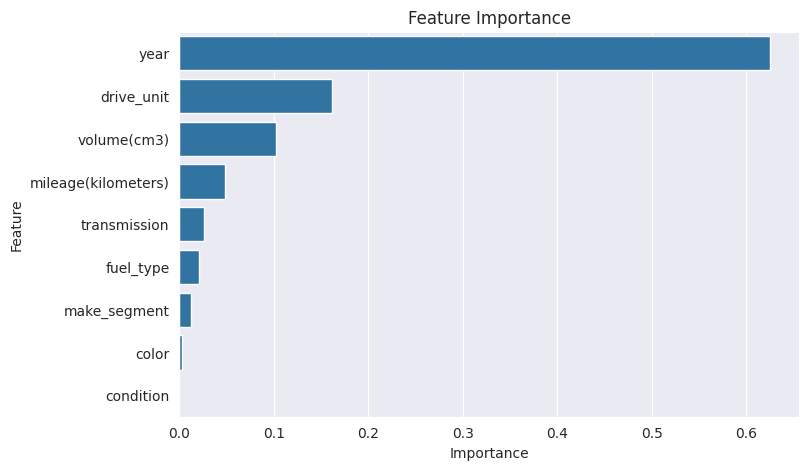

In [98]:
# Bar Plot
sns.set_style('darkgrid')
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feat_df)
plt.title('Feature Importance')
plt.show()

## Conclusion

The objective of this project was to predict car prices in Belarus by analyzing features such as brand, year, engine volume, fuel type, transmission, mileage, drive unit, color, and segment. Exploratory data analysis revealed a significant increase in car prices after 2000. Cars running on petrol with automatic transmission generally have higher prices than diesel cars with manual transmission. Electric cars are distinctly more expensive than all other fuel types. Vehicles with all-wheel drive command the highest prices among all drive units. Among car segments, specialty cars have the highest prices, followed by luxury European, American, and Asian segments.

A Decision Tree Regressor model was employed to predict car prices, achieving 81.02% accuracy. Analysis of feature importance indicated that year of manufacture and engine volume are the most influential factors in predicting car price.